# 数据科学基础第八、九课作业

刘昕雅 2016200701

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 第一题 模拟实验

In [37]:
gg=pd.read_csv("GaltonFamilies.csv")

In [38]:
#1.添加孩子身高为cm
gg["height"]=gg["childHeight"]*2.54
gg.head(5)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,height
0,1,78.5,67.0,75.43,4,1,male,73.2,185.928
1,1,78.5,67.0,75.43,4,2,female,69.2,175.768
2,1,78.5,67.0,75.43,4,3,female,69.0,175.260
3,1,78.5,67.0,75.43,4,4,female,69.0,175.260
4,2,75.5,66.5,73.66,4,1,male,73.5,186.690


In [74]:
#计算height的身高的频率分布
height=np.unique(gg.height)

In [75]:
height

array([142.24 , 144.78 , 146.05 , 147.32 , 149.86 , 152.4  , 152.654,
       153.67 , 154.94 , 155.448, 156.21 , 156.718, 157.48 , 157.988,
       158.242, 158.75 , 159.258, 160.02 , 160.528, 161.29 , 161.798,
       162.56 , 163.068, 163.83 , 164.338, 165.1  , 165.608, 166.37 ,
       166.878, 167.64 , 168.148, 168.91 , 169.418, 170.18 , 170.688,
       171.45 , 171.958, 172.212, 172.72 , 173.228, 173.99 , 174.498,
       175.26 , 175.768, 176.53 , 177.038, 177.8  , 178.308, 179.07 ,
       179.578, 180.34 , 180.848, 181.61 , 182.118, 182.88 , 184.15 ,
       184.658, 185.42 , 185.928, 186.69 , 187.96 , 188.468, 190.5  ,
       193.04 , 194.31 , 198.12 , 200.66 ])

In [100]:
#计算频数
from collections import Counter
frequence=[]
for i in range(len(height)):
    n=list(gg.height).count(height[i])
    frequence=np.append(frequence,n)
frequence

array([ 1.,  2.,  1.,  1.,  1., 19.,  1.,  5., 19.,  1.,  7.,  3., 42.,
        1.,  1., 24.,  2., 48.,  3., 24.,  5., 45.,  1., 27.,  3., 63.,
        5., 32.,  3., 59.,  1., 22.,  4., 52.,  3., 14.,  5.,  1., 57.,
        1., 22.,  6., 45.,  7., 10.,  3., 56.,  4., 28.,  5., 39.,  4.,
       10.,  3., 34.,  3.,  3., 22.,  3.,  2.,  7.,  1.,  4.,  1.,  1.,
        1.,  1.])

In [103]:
#合为dataframe
new=pd.DataFrame({"height":height,"frequence":frequence})
new.head(5)

,height,frequence
0,142.24,1.0
1,144.78,2.0
2,146.05,1.0
3,147.32,1.0
4,149.86,1.0


In [97]:
type(gg.height)

pandas.core.series.Series

In [41]:
def empirical_hist_height(n):
    gg["height"].sample(n,replace=True).hist(bins=bins,edgecolor="green",facecolor="yellow",density=True)
    plt.grid(True)
    plt.xlabel("height")
    plt.ylabel("density")
    plt.title("Chidren height histograme")

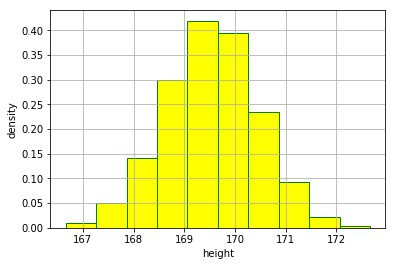

In [47]:
#抽取均值的经验直方图
sampleSize=100
means=[]
for i in np.arange(5000):
    new_mean=np.mean(gg.height.sample(sampleSize,replace=True))
    means=np.append(means,new_mean)
mean_set=pd.DataFrame({"Sample mean":means})
plt.hist(mean_set["Sample mean"],bins=10,edgecolor="green",
        facecolor="yellow",density=True)
plt.grid(True)
plt.xlabel("height")
plt.ylabel("density")
plt.title("")
plt.show()

In [49]:
# 抽样的平均数的平均数统计
mean2=np.mean(mean_set["Sample mean"])
mean2

169.52982400799968

In [52]:
#原始数据的平均数
mean1=np.mean(gg["height"])
mean1

169.53466595289095

In [72]:
difff=abs(np.mean(mean_set["Sample mean"])-np.mean(gg["height"]))
difff

0.004841944891268213

In [ ]:
就有点奇怪直接用mean1-mean2得到的结果就是0.0如下，不知道为什么

In [71]:
dif=mean1-mean2
dif
round(dif,5)

0.0

# 第二题 估计函数面积

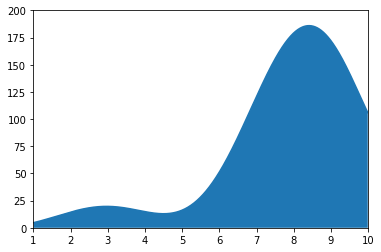

In [2]:
#绘制函数图像
x=np.arange(1,10,0.01)
y=(1.5+np.sin(x))*(x+np.power(x,2))
#f(x)
plt.plot(x,y)
plt.xlim(1,10)
plt.ylim(0,200)
plt.fill_between(x,y,where=(x>1)&(x<10))
plt.show()

In [104]:
#计算函数的积分表达式

In [115]:
import sympy
x = sympy.symbols('x')
integrate(np.sin(x),x)
#sympy.integrate(1.5+np.sin(x))*(x+np.power(x,2),x)

NameError: name 'integrate' is not defined

In [30]:
#计算方形中投入阴影部分的面积
def cal_ratio(n):
    #在长方形中均匀撒豌豆
    x=np.random.uniform(1,10,n)
    y=np.random.uniform(0,200,n)
    #计算在函数中的豌豆的个数)
    result=3/4*x+1/2*np.power(x,2)+np.sin(x)-x*np.cos(x)
    -np.power(x,2)*np.cos(x)+2*x*np.sin(x)+2*np.cos(x)-y<=0
    return result.sum()/n

In [31]:
r=[]
for n in np.arange(1,10001):
    a=cal_ratio(n)
    r=np.append(r,a)

In [32]:
r[999]

23.212845062348627

In [34]:
s=10*200*r[999]
s

46425.690124697256